## Data-cleaning setup

We begin the cleaning workflow by importing **pandas**, the core library we’ll use for loading, inspecting, and transforming the accident dataset.

### Import required libraries

We load **pandas**, the main Python toolkit for data wrangling and analysis, and give it the conventional alias `pd` for shorter code.
We also load matplotlib.pyplot by its common alias `plt`.

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the aviation accident dataset

We start by importing the dataset, which includes all recorded aviation accidents from 1962 to 2023.
The file isn’t encoded in UTF-8, so trying to load it that way causes an error.
Using `encoding="latin1"` instead solves the problem and lets us read in the full dataset.
We then use `df.head()` to take a quick look at the first few rows and get a sense of the data.


In [204]:
df = pd.read_csv("AviationData.csv", encoding = "latin1") # utf-8 throws an error, so switched to latin1 encoding
df.head() # initial data understanding

C:\Users\HP\AppData\Local\Temp\ipykernel_10996\532749095.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding = "latin1") # utf-8 throws an error, so switched to latin1 encoding


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Check dataset dimensions and structure

Before cleaning, it helps to know how large the dataset is and what it contains.
The code below:

i. Prints the **number of rows** and **columns** so we see the overall size.
ii. Calls `df.info()` to show basic data types and missing-value counts.
iii. Lists all column names, giving us a clear inventory of the fields we’ll be working with.


In [205]:
# Now we need to understand how big the data we're working with is
tuple_shape = df.shape

print(f"Rows: {tuple_shape[0]}")
print(f"Columns: {tuple_shape[1]}")
df.info()
print(df.columns.to_list())

Rows: 88889
Columns: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make          

### Convert date columns to true datetime objects

Turning the text-based date columns into pandas `datetime` format lets us later sort, filter, or group by year and month.
Using `errors="coerce"` quietly sets any bad or empty strings to `NaT` (pandas’ “not-a-time” value), so the loop finishes without crashing even if some dates are missing.


In [206]:
# we convert dates to datetime format (not sure if needed, just for practise)
date_cols = ["Event.Date", "Publication.Date"]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

C:\Users\HP\AppData\Local\Temp\ipykernel_10996\1111638517.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")


### Convert key count columns to numeric

These five columns hold numbers (engine count and injury totals) but were read in as text.
`pd.to_numeric(..., errors="coerce")` changes them to proper numeric types and turns any bad entries into `NaN`, which we can handle later.
A quick `dtypes` printout confirms the conversion worked for both the numeric and date columns.


In [207]:
# Next, convert numeric columns to Numeric values
numeric_cols = ["Number.of.Engines", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors ="coerce")

# Make sure our conversion worked (it did)
print(df[numeric_cols].dtypes)
print(df[date_cols].dtypes)

Number.of.Engines         float64
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
dtype: object
Event.Date          datetime64[ns]
Publication.Date    datetime64[ns]
dtype: object


### Remove columns that aren’t useful for our risk analysis

The fields listed in `irrelevant_columns` are mostly IDs, location codes, or carrier details that won’t help us judge aircraft safety.
We drop them to keep the dataset focused and easier to work with, then call `df_simple.info()` to confirm the new, slimmer structure.


In [208]:
# Next, we need to drop colums that won't help our analysis
irrelevant_columns = ["Event.Id", "Accident.Number", "Latitude", "Longitude", "Airport.Code", "Airport.Name", "Registration.Number", "Schedule", "Location", "Air.carrier", "Report.Status", "Country"]
df_simple = df.drop(columns=irrelevant_columns)
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Injury.Severity         87889 non-null  object        
 3   Aircraft.damage         85695 non-null  object        
 4   Aircraft.Category       32287 non-null  object        
 5   Make                    88826 non-null  object        
 6   Model                   88797 non-null  object        
 7   Amateur.Built           88787 non-null  object        
 8   Number.of.Engines       82805 non-null  float64       
 9   Engine.Type             81793 non-null  object        
 10  FAR.Description         32023 non-null  object        
 11  Purpose.of.flight       82697 non-null  object        
 12  Total.Fatal.Injuries    77488 non-null  float6

### Fill missing numbers with each column’s median value

To avoid losing rows that have a few missing injury or engine counts, we fill those gaps with the median of each column.
The median is a safe choice because it isn’t thrown off by extreme accident records.
After filling, we call `df_simple.info()` again to confirm there are no remaining nulls in the numeric columns.

In [209]:
# We're going to fill the NaN in the numerical columns by entering the median
for i in numeric_cols:
    df_simple[i] = df_simple[i].fillna(df_simple[i].median())

df_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Injury.Severity         87889 non-null  object        
 3   Aircraft.damage         85695 non-null  object        
 4   Aircraft.Category       32287 non-null  object        
 5   Make                    88826 non-null  object        
 6   Model                   88797 non-null  object        
 7   Amateur.Built           88787 non-null  object        
 8   Number.of.Engines       88889 non-null  float64       
 9   Engine.Type             81793 non-null  object        
 10  FAR.Description         32023 non-null  object        
 11  Purpose.of.flight       82697 non-null  object        
 12  Total.Fatal.Injuries    88889 non-null  float6

### Fill small gaps in key categorical columns

Some rows still have a few missing labels (NaN) in columns like flight purpose, aircraft damage, and weather.
Rather than lose those rows, we replace each missing entry with the **most common value (mode)** for that column.
This keeps the categories consistent and avoids introducing new labels.

In [210]:
# we'll also fill categorical data with few values missing with the most frequent category
categorical_data = ["Purpose.of.flight", "Aircraft.damage", "Injury.Severity", "Engine.Type", "Weather.Condition", "Amateur.Built"]

for i in categorical_data:
    most_common = df_simple[i].mode(dropna=True)[0] # to get the mode
    df_simple[i].fillna(most_common, inplace=True)

df_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Injury.Severity         88889 non-null  object        
 3   Aircraft.damage         88889 non-null  object        
 4   Aircraft.Category       32287 non-null  object        
 5   Make                    88826 non-null  object        
 6   Model                   88797 non-null  object        
 7   Amateur.Built           88889 non-null  object        
 8   Number.of.Engines       88889 non-null  float64       
 9   Engine.Type             88889 non-null  object        
 10  FAR.Description         32023 non-null  object        
 11  Purpose.of.flight       88889 non-null  object        
 12  Total.Fatal.Injuries    88889 non-null  float6

C:\Users\HP\AppData\Local\Temp\ipykernel_10996\1771050694.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_simple[i].fillna(most_common, inplace=True)


### Inspect the raw “Make” values for inconsistencies

Before cleaning, we list the 20 most frequent manufacturer names. This quick peek shows issues like mixed casing, extra spaces, and punctuation that we’ll fix next.

In [211]:
# There's a naming inconsistency in the names of makes. We have to resolve that
df_simple["Make"].dropna().value_counts().head(20)

Make
Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
Bell                  2134
Boeing                1594
BOEING                1151
Grumman               1094
Mooney                1092
BEECH                 1042
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
BELL                   588
Mcdonnell Douglas      526
Aeronca                487
Maule                  445
Name: count, dtype: int64

### Standardize “Make” names and preview common models

We clean the **Make** column by capitalizing, trimming spaces, and stripping punctuation so each manufacturer is counted once. After that, we check the 20 most common **Model** names to see what aircraft appear most often.

In [212]:
# Combined all names by making case uniform and removing whitespace 
df_simple["Make"] = df_simple["Make"].str.capitalize().str.strip().str.replace(r"[^\w\s]", "", regex=True)
df_simple["Make"].dropna().value_counts().head(20)

Make
Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air tractor            691
Aeronca                636
Mcdonnell douglas      608
Maule                  589
Champion               519
Stinson                439
Aero commander         429
De havilland           422
Luscombe               414
Name: count, dtype: int64

### Keep only rows with both Make and Model

Rows missing either field can’t be tied to a specific aircraft, so we drop them to ensure every record has a valid manufacturer and model for analysis.


In [213]:
# lastly, we drop every row that doesn't have the make or model
df_simple = df_simple.dropna(subset=["Make", "Model"])
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88777 non-null  object        
 1   Event.Date              88777 non-null  datetime64[ns]
 2   Injury.Severity         88777 non-null  object        
 3   Aircraft.damage         88777 non-null  object        
 4   Aircraft.Category       32245 non-null  object        
 5   Make                    88777 non-null  object        
 6   Model                   88777 non-null  object        
 7   Amateur.Built           88777 non-null  object        
 8   Number.of.Engines       88777 non-null  float64       
 9   Engine.Type             88777 non-null  object        
 10  FAR.Description         31936 non-null  object        
 11  Purpose.of.flight       88777 non-null  object        
 12  Total.Fatal.Injuries    88777 non-null  float64    

In [214]:
# now we combine make and model to get very specific aircrafts
df_simple["Make_Model"] = df_simple["Make"] + " " + df_simple["Model"]

In [215]:
# 1. Define the cutoff date (25 years back from Jan 1 2025 → Jan 1 2000)
cutoff = pd.Timestamp("2000-01-01")

# 2. Keep only rows on or after that date
df_recent = df_simple[df_simple["Event.Date"] >= cutoff].copy()

print("Rows after date filter:", df_recent.shape[0])

Rows after date filter: 41134


In [216]:
# 1. Count accidents per make
make_counts = df_recent["Make"].value_counts()

# 2. Identify makes that meet the 100-incident threshold
common_makes = make_counts[make_counts >= 100].index

# 3. Filter the DataFrame
df_100plus = df_recent[df_recent["Make"].isin(common_makes)]

print(f"Makes kept: {len(common_makes)}")
print(f"Rows kept:  {df_100plus.shape[0]}")


Makes kept: 38
Rows kept:  29396


We now have a clean dataset!

## Drawing insights from the data

With the dataset now cleaned and trimmed, we can start turning rows of numbers into answers the aviation team can use.  
Our plan is to build the story in layers:

i. **Frequency** – Which makes and models show up least often in the accident log?  
ii. **Severity** – For each of those, what share of accidents were _fatal or serious_ versus _minor or none_?  
iii. **Damage level** – How often was the aircraft _destroyed_ or only _slightly damaged_?  

Working through these steps will let us spot aircraft that truly carry lower real-world risk.


### Count how many accidents each aircraft make appears in
We first create crash_dict, which tallies accidents by Make and converts the result to a regular Python dictionary.
Then we peek at the very first entry—both its value (how many crashes) and the full key-value pair (which make plus its count).

In [217]:
crash_dict = df_recent["Make"].value_counts().to_dict()
list(crash_dict.values())[0] # Prints the first key of a list of most frequent crashes
list(crash_dict.items())[0] # Prints first value of a list of most frequent crashes

('Cessna', 10584)

### Why “most crashes” does not mean “most dangerous”
Seeing a manufacturer at the top of this list doesn’t automatically mean its aircraft are less safe; it may simply have more planes in service or fly more hours than others. To judge actual risk, we’ll next compare crash counts with crash severity.

### Categorizing Flights
To make the data easier to work with, I grouped the different Purpose.of.flight values into two main categories: Private and Commercial. I wrote a function that checks the flight purpose and labels it as either "Private" or "Commercial" based on what kind of flight it was. This helps simplify the analysis.

In [218]:
# We need to start by properly categorizing flights
def categorize_flight(purpose):
    private = [
        'Personal', 'Instructional', 'Business', 'Executive/corporate', 
        'Positioning', 'Ferry', 'Unknown', 'Skydiving', 'Flight Test',
        'Glider Tow', 'Air Race show', 'Air Race/show', 'Banner Tow',
        'ASHO', 'PUBS', 'PUBL'
    ]
    commercial = [
        'Aerial Application', 'Other Work Use', 'Aerial Observation',
        'Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - Local',
        'Public Aircraft - State', 'External Load', 'Firefighting', 'Air Drop'
    ]
    
    if purpose in private:
        return 'Private'
    elif purpose in commercial:
        return 'Commercial'
    else:
        return 'Unknown'

df_100plus['Flight.Category'] = df_100plus['Purpose.of.flight'].apply(categorize_flight)


C:\Users\HP\AppData\Local\Temp\ipykernel_10996\4065576307.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100plus['Flight.Category'] = df_100plus['Purpose.of.flight'].apply(categorize_flight)


Now we can check if our new columns was added:

In [219]:
# Now we can check if our new column is added
df_100plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29396 entries, 47675 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      29396 non-null  object        
 1   Event.Date              29396 non-null  datetime64[ns]
 2   Injury.Severity         29396 non-null  object        
 3   Aircraft.damage         29396 non-null  object        
 4   Aircraft.Category       19824 non-null  object        
 5   Make                    29396 non-null  object        
 6   Model                   29396 non-null  object        
 7   Amateur.Built           29396 non-null  object        
 8   Number.of.Engines       29396 non-null  float64       
 9   Engine.Type             29396 non-null  object        
 10  FAR.Description         19644 non-null  object        
 11  Purpose.of.flight       29396 non-null  object        
 12  Total.Fatal.Injuries    29396 non-null  float64

## Univariate 1: Airplanes Damage During Crash

### Private Enterprise
Because the company has interest in both commercial and private enterprises, we need to look at what the most frequent damage on the aircraft is. Private models may suffer different damage levels from commercial models.
We first narrow the data to:

1. **Makes with at least 100 accidents** (to keep only well-represented manufacturers), and  
2. **Flights classified as Private**.

The bar chart below shows how those accidents break down by damage level—**Destroyed, Substantial, Minor**—for this filtered subset. This helps us see how often private-flight crashes end in total loss versus lighter damage among the most common aircraft makes.

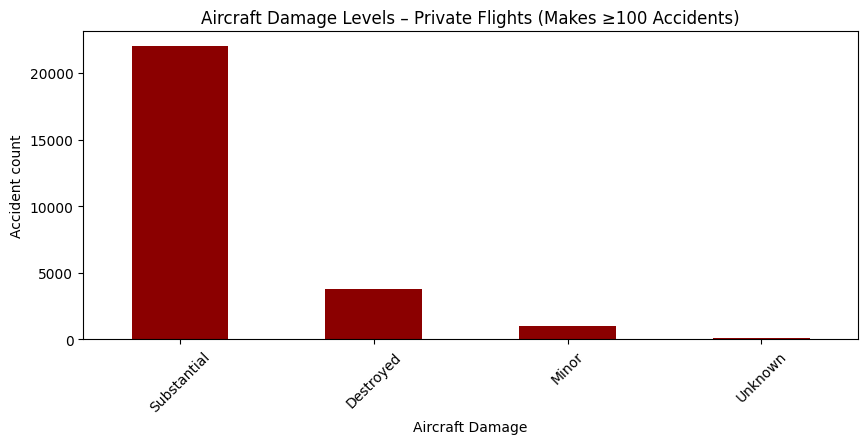

In [220]:
# Filter to (a) makes with ≥100 accidents  AND  (b) private flights
df_private_100 = df_100plus[df_100plus["Flight.Category"] == "Private"]

(df_private_100["Aircraft.damage"]
     .value_counts()
     .plot(kind="bar", figsize=(10,4), color="darkred"))

plt.title("Aircraft Damage Levels – Private Flights (Makes ≥100 Accidents)")
plt.ylabel("Accident count")
plt.xlabel("Aircraft Damage")
plt.xticks(rotation=45)
plt.show()


We can see that most crashes result in substantial damage. This shows that an aircraft that has the highest percentage of crashes with minor damage against total crashes in generally safer.

### Commercial Enterprise

### Aircraft damage levels for commercial flights (common makes)

This chart shows aircraft damage levels for **commercial flights**, but only for makes with **at least 100 accidents**. It helps give a general idea of how severe commercial accidents tend to be, especially compared to private ones.


This bar chart looks at **commercial flight accidents** for aircraft makes that had **100 or more incidents**. It shows how often each level of damage occurred, giving us a sense of how serious commercial accidents tend to be among the most commonly crashed aircraft.

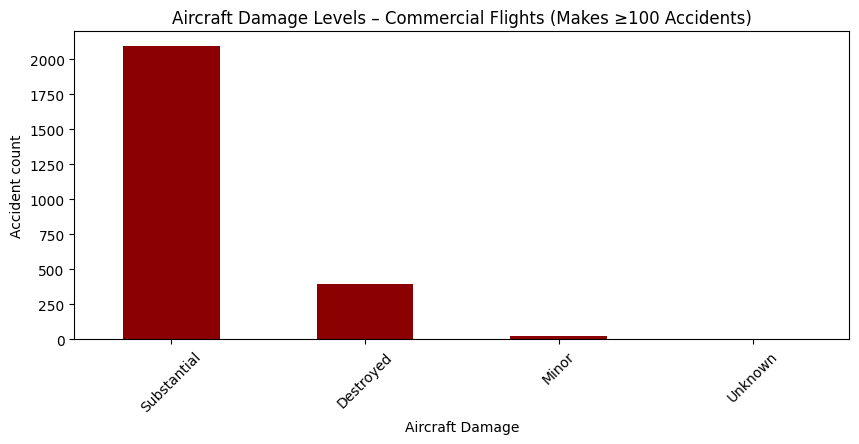

In [221]:
# Filter to (a) makes with ≥100 accidents  AND  (b) private flights
df_commercial_100 = df_100plus[df_100plus["Flight.Category"] == "Commercial"]

(df_commercial_100["Aircraft.damage"]
     .value_counts()
     .plot(kind="bar", figsize=(10,4), color='darkred'))

plt.title("Aircraft Damage Levels – Commercial Flights (Makes ≥100 Accidents)")
plt.ylabel("Accident count")
plt.xlabel("Aircraft Damage")
plt.xticks(rotation=45)
plt.show()


We can see that commercial flights also often sustain substantial damage, are more rarely destroyed and almost never sustain minor damage. This shows that plane crashes are most likely to cause substantial damage and greater loss than minor repairable damage. So we should exercise caution while selecting our model!

## Univariate 2: Least-incident aircraft makes (≥100 accidents)

Here we plot the 10 makes that have **the fewest recorded accidents** among the manufacturers with at least 100 incidents in our filtered dataset. This highlights brands that appear less often in the accident log, suggesting either smaller fleet size or potentially better safety records compared with their higher-incident peers.


### Cleaning Inconsistent Manufacturer Names

To ensure accurate grouping and analysis, we fixed some inconsistencies in the `Make` column. Specifically, we corrected common variations or typos like `"Airbus industrie"` to `"Airbus"` and `"De havilland"` to `"Dehavilland"`. This helps avoid treating the same manufacturer as separate entries due to formatting differences.


In [222]:
# Fix some typos in make names
df_private_100["Make"] = df_private_100["Make"].replace({
    "Airbus industrie": "Airbus",
    "De havilland": "Dehavilland",
    "Air tractor inc": "Air tractor"
})

C:\Users\HP\AppData\Local\Temp\ipykernel_10996\3301348369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_private_100["Make"] = df_private_100["Make"].replace({


### Least-incident aircraft makes (private flights)

Among makes that appear in **≥100 private-flight accidents**, these ten have the lowest totals—pointing to aircraft that rarely show up in private-flight crash reports.


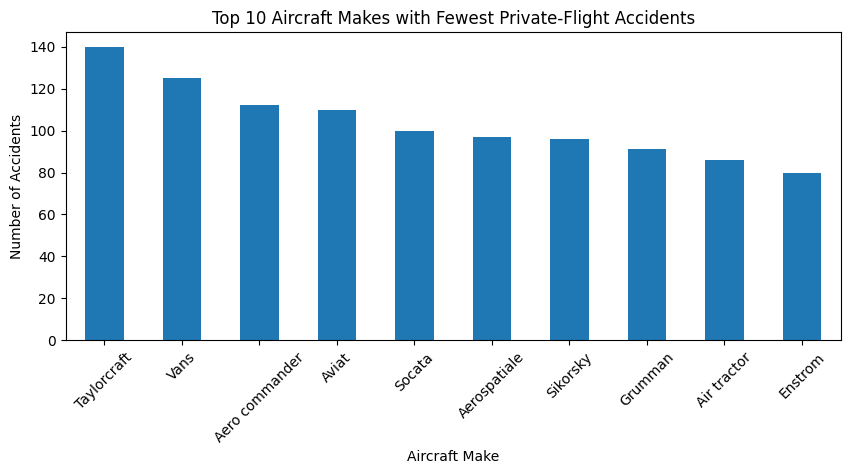

In [223]:
# Top 10 makes with the fewest accidents in PRIVATE flights
top_10_private = df_private_100['Make'].value_counts().tail(10)

top_10_private.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Aircraft Makes with Fewest Private-Flight Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


### Least-incident aircraft makes (commercial flights)
This bar chart highlights the ten aircraft makes that appear least often in commercial-flight crashes, among manufacturers with at least 100 total incidents. Lower counts suggest these makes are less frequently involved in commercial accidents.

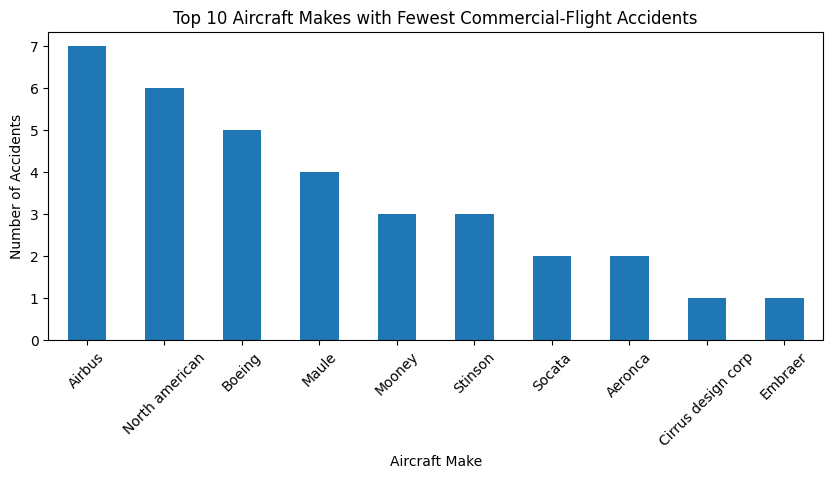

In [224]:
# Top 10 makes with the fewest accidents in COMMERCIAL flights (≥100 group)
top_10_commercial = df_commercial_100['Make'].value_counts().tail(10)

top_10_commercial.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Aircraft Makes with Fewest Commercial-Flight Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

This scatter plot compares the number of engines on an aircraft to the total fatal injuries in an accident. Most crashes involve aircrafts with 1 or 2 engines. Fatalities are mostly concentrated in 1-engine planes, but that is because it is the most common number of engines. 4 engine planes have less reported crashes but often have high fatalities, showing that they are relatively less safe.

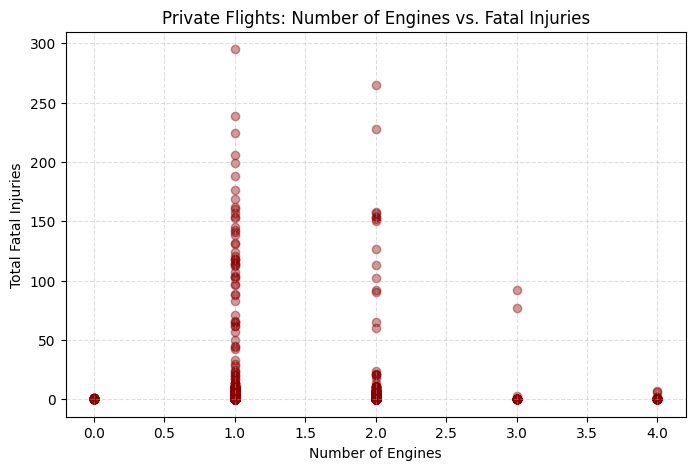

In [225]:
# Use the DataFrame that already holds private flights (df_private_100 or df_private)
plt.figure(figsize=(8,5))
plt.scatter(df_private_100["Number.of.Engines"],
            df_private_100["Total.Fatal.Injuries"],
            alpha=0.4, color='darkred')

plt.title("Private Flights: Number of Engines vs. Fatal Injuries")
plt.xlabel("Number of Engines")
plt.ylabel("Total Fatal Injuries")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


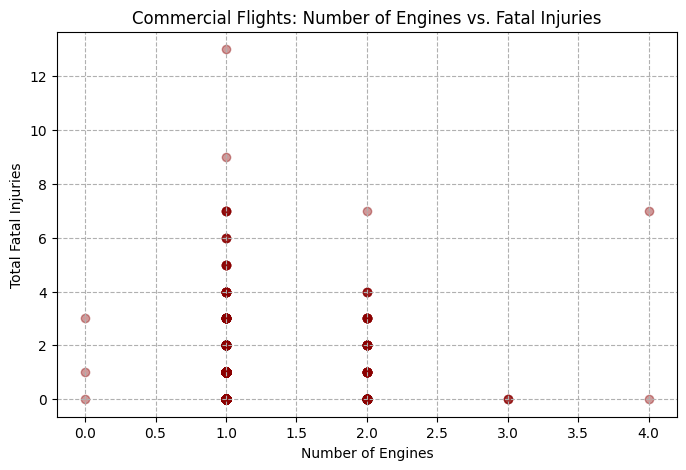

In [226]:
plt.figure(figsize=(8,5))
plt.scatter(df_commercial_100["Number.of.Engines"],
            df_commercial_100["Total.Fatal.Injuries"],
            alpha=0.4, color='darkred')

plt.title("Commercial Flights: Number of Engines vs. Fatal Injuries")
plt.xlabel("Number of Engines")
plt.ylabel("Total Fatal Injuries")
plt.grid(True, linestyle="--")
plt.show()


In [227]:
injury_severe = (df_100plus["Total.Fatal.Injuries"] + df_100plus["Total.Serious.Injuries"]) > 0
df_100plus["Crash_Severity"] = injury_severe.map({True: "Severe", False: "Non-Severe"})
print(df_100plus["Crash_Severity"].value_counts())


Crash_Severity
Non-Severe    19687
Severe         9709
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_10996\1003552206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100plus["Crash_Severity"] = injury_severe.map({True: "Severe", False: "Non-Severe"})


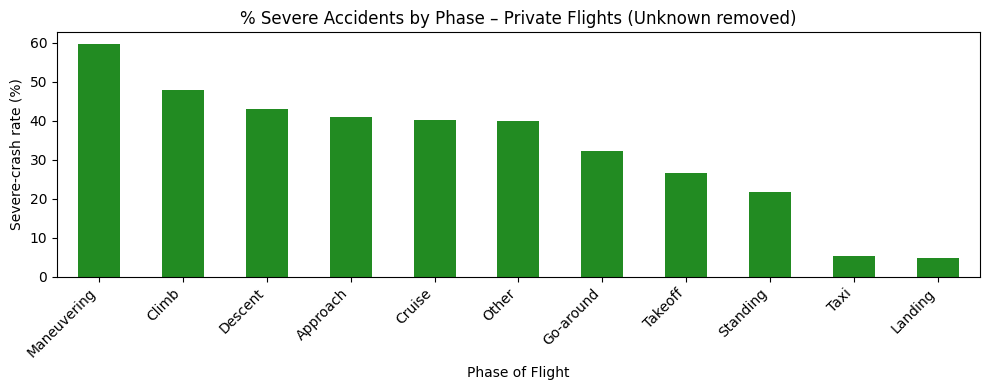

In [232]:
phase_severe_private = (
    df_private_100[
        (df_private_100["Broad.phase.of.flight"].notna()) &
        (df_private_100["Broad.phase.of.flight"] != "Unknown")
    ]
    .groupby("Broad.phase.of.flight")["Severe_Flag"]
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,4))
phase_severe_private.plot(kind="bar", color="forestgreen")
plt.title("% Severe Accidents by Phase – Private Flights (Unknown removed)")
plt.ylabel("Severe-crash rate (%)")
plt.xlabel("Phase of Flight")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


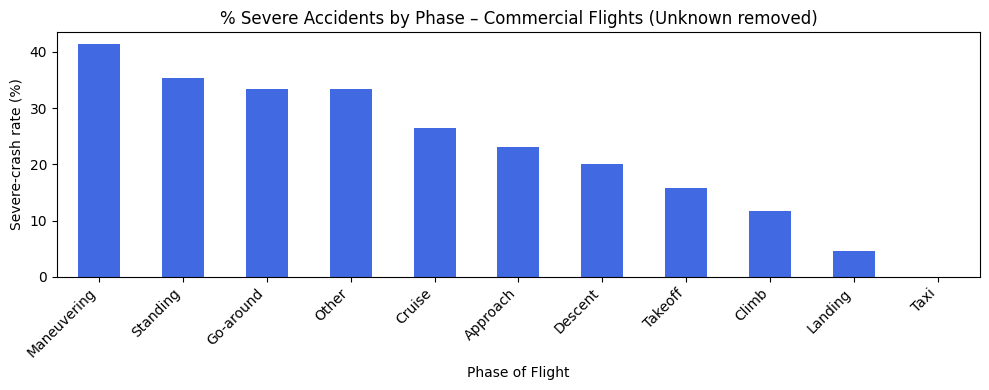

In [233]:
phase_severe_comm = (
    df_commercial_100[
        (df_commercial_100["Broad.phase.of.flight"].notna()) &
        (df_commercial_100["Broad.phase.of.flight"] != "Unknown")
    ]
    .groupby("Broad.phase.of.flight")["Severe_Flag"]
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,4))
phase_severe_comm.plot(kind="bar", color="royalblue")
plt.title("% Severe Accidents by Phase – Commercial Flights (Unknown removed)")
plt.ylabel("Severe-crash rate (%)")
plt.xlabel("Phase of Flight")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10996\3585141298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100plus["Severe_Flag"] = (df_100plus["Crash_Severity"] == "Severe").astype(int)


<Figure size 900x400 with 0 Axes>

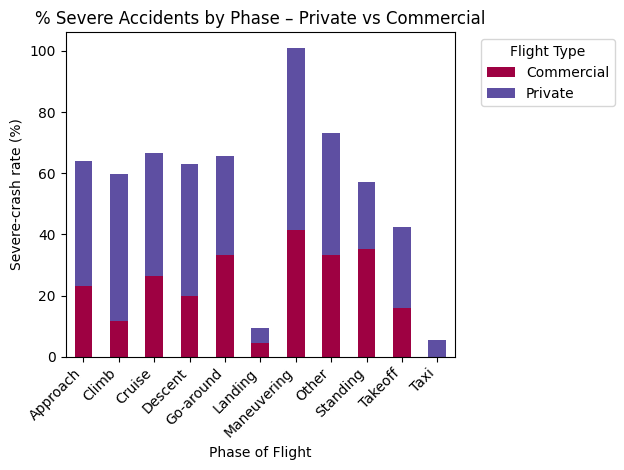

In [236]:
# Make sure Severe_Flag exists
if "Severe_Flag" not in df_100plus.columns:
    df_100plus["Severe_Flag"] = (df_100plus["Crash_Severity"] == "Severe").astype(int)

# Filter rows with a valid phase
mask = (
    df_100plus["Broad.phase.of.flight"].notna()
    & (df_100plus["Broad.phase.of.flight"] != "Unknown")
)

phase_cat = (
    df_100plus[mask]
      .groupby(["Broad.phase.of.flight", "Flight.Category"])["Severe_Flag"]
      .mean()
      .mul(100)                 # convert to %
      .unstack(fill_value=0)    # rows = phase, cols = flight type
      .sort_index()             # alphabetical order; adjust if you want custom order
)

plt.figure(figsize=(9,4))
phase_cat.plot(kind="bar", stacked=True, colormap="Spectral")
plt.title("% Severe Accidents by Phase – Private vs Commercial")
plt.ylabel("Severe-crash rate (%)")
plt.xlabel("Phase of Flight")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Flight Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
